<a href="https://colab.research.google.com/github/chandrusrini679/assignments-3/blob/main/Prj1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import lib

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Load Dataset

In [ ]:
iris = pd.read_csv("Iris.csv")

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.drop("Id", axis = 1, inplace = True)

In [ ]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 3.EDA

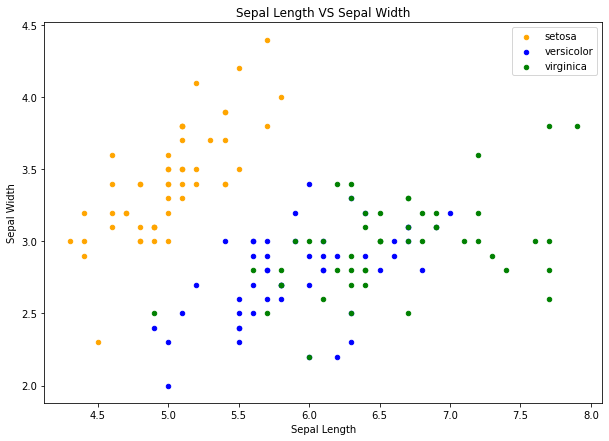

In [ ]:
fig = iris[iris.Species == "Iris-setosa"].plot(kind = 'scatter', x='SepalLengthCm', y ='SepalWidthCm', color = 'orange', label = "setosa" )
iris[iris.Species == "Iris-versicolor"].plot(kind = 'scatter', x='SepalLengthCm', y ='SepalWidthCm', color = 'blue', label = "versicolor", ax = fig )
iris[iris.Species == "Iris-virginica"].plot(kind = 'scatter', x='SepalLengthCm', y ='SepalWidthCm', color = 'green', label = "virginica", ax = fig )

fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Sepal Width")

fig= plt.gcf()
fig.set_size_inches(10,7)
plt.show()

C:\Users\AJANTHA\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


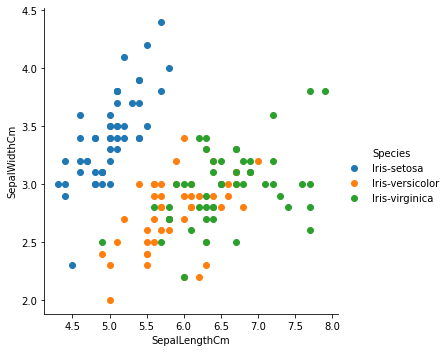

In [ ]:
sns.FacetGrid(iris, hue = 'Species', size = 5).map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()

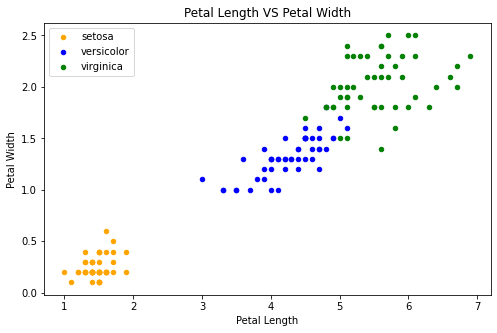

In [ ]:
fig = iris[iris.Species == "Iris-setosa"].plot(kind = 'scatter', x='PetalLengthCm', y ='PetalWidthCm', color = 'orange', label = "setosa" )
iris[iris.Species == "Iris-versicolor"].plot(kind = 'scatter', x='PetalLengthCm', y ='PetalWidthCm', color = 'blue', label = "versicolor", ax = fig )
iris[iris.Species == "Iris-virginica"].plot(kind = 'scatter', x='PetalLengthCm', y ='PetalWidthCm', color = 'green', label = "virginica", ax = fig )

fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length VS Petal Width")

fig= plt.gcf()
fig.set_size_inches(8,5)
plt.show()

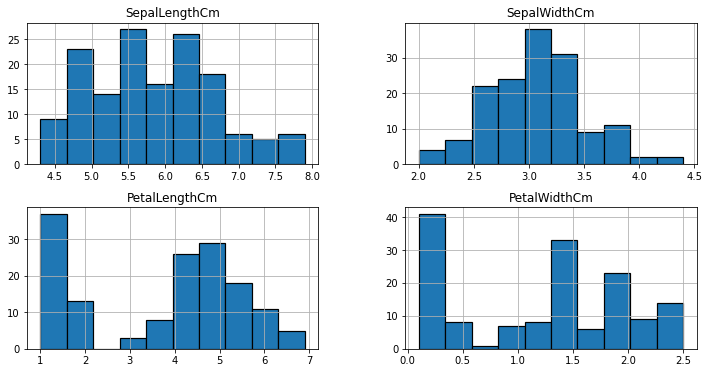

In [ ]:
iris.hist(edgecolor = 'black', linewidth = 1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

Classification Model: one or more classses
Regression: continous variable

Attributes:=> Features

Target Variable: => 3 Species


# Feature Engi

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics



In [ ]:
iris.shape

(150, 5)

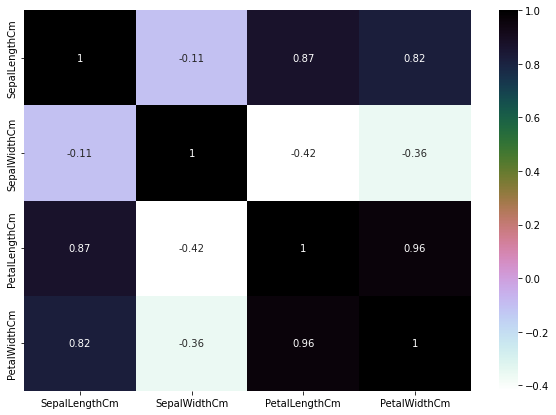

In [ ]:
plt.figure(figsize= (10,7))
sns.heatmap(iris.corr(),  annot = True,cmap= "cubehelix_r")
plt.show()

Observation:
1. Sepal length and Sepal Width = > not correlated
2. Petal length and Petal Width = > high correlated
3. 1 Petal Feature and 1 Sepal Feature = > not corr
=> Variance, Accuracy

4. Algorithm

=> train, test
=>pass-> training data, fit, transform
=> pass -> testing data, predict
=> predicted outcome, accuracy

In [ ]:
train, test = train_test_split(iris, test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [ ]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm' ]]
train_y = train.Species

test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm' ]]
test_y = test.Species


In [ ]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
81,5.5,2.4,3.7,1.0
91,6.1,3.0,4.6,1.4
139,6.9,3.1,5.4,2.1
31,5.4,3.4,1.5,0.4
106,4.9,2.5,4.5,1.7


In [ ]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
111,6.4,2.7,5.3,1.9
108,6.7,2.5,5.8,1.8
27,5.2,3.5,1.5,0.2
59,5.2,2.7,3.9,1.4
131,7.9,3.8,6.4,2.0


# 5. Classifier

In [ ]:
# 1. SVM
model = svm.SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print("The Accuracy of SVM is: ",metrics.accuracy_score(prediction, test_y))

The Accuracy of SVM is:  0.9555555555555556


In [ ]:
#2. Logistic Regression

model1  = LogisticRegression()
model1.fit(train_X, train_y)
prediction = model1.predict(test_X)
print("The Accuracy of LR is: ",metrics.accuracy_score(prediction, test_y))

The Accuracy of LR is:  0.9555555555555556


In [ ]:
#3. Decision Tree - CART
model2 = DecisionTreeClassifier()
model2.fit(train_X, train_y)
prediction = model2.predict(test_X)
print("The Accuracy of DT is: ",metrics.accuracy_score(prediction, test_y))


The Accuracy of DT is:  0.9333333333333333


In [ ]:
# 4. KNN
model3 = KNeighborsClassifier(n_neighbors = 3)
model3.fit(train_X, train_y)
prediction = model3.predict(test_X)
print("The Accuracy of KNN is: ",metrics.accuracy_score(prediction, test_y))

The Accuracy of KNN is:  0.9555555555555556


# Towards Feature

In [ ]:
petal = iris[['PetalLengthCm', 'PetalWidthCm', 'Species']]
sepal = iris[['SepalLengthCm','SepalWidthCm', 'Species']]


In [ ]:
#For Petal
train_p, test_p = train_test_split(petal, test_size = 0.3, random_state =0)
train_x_p = train_p[['PetalLengthCm', 'PetalWidthCm' ]]
train_y_p = train_p.Species

test_x_p = test_p[['PetalLengthCm', 'PetalWidthCm' ]]
test_y_p = test_p.Species


In [ ]:
#For Sepal
train_s, test_s = train_test_split(sepal, test_size = 0.3, random_state =0)
train_x_s = train_s[['SepalLengthCm','SepalWidthCm' ]]
train_y_s = train_s.Species

test_x_s = test_s[['SepalLengthCm','SepalWidthCm']]
test_y_s = test_s.Species


In [ ]:
# 1. SVM
model = svm.SVC()
model.fit(train_x_p, train_y_p)
prediction = model.predict(test_x_p)
print("The Accuracy of SVM Petal is: ",metrics.accuracy_score(prediction, test_y_p))

model1 = svm.SVC()
model1.fit(train_x_s, train_y_s)
prediction1 = model1.predict(test_x_s)
print("The Accuracy of SVM Sepal is: ",metrics.accuracy_score(prediction1, test_y_s))

The Accuracy of SVM Petal is:  0.9777777777777777
The Accuracy of SVM Sepal is:  0.8
